# Statistical Learning

## Importing Librariries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy

## Reading the data

In [3]:
df=pd.read_csv(r"D:\csv_files\267 - insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Shape of the data

In [5]:
df.shape

(1338, 7)

## Data type of each attribute

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().any().sum()

0

## Checking the presence of missing values

In [8]:
dt.isnull().sum()

NameError: name 'dt' is not defined

## 5 point summary of numerical attributes

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

<AxesSubplot:xlabel='charges', ylabel='Frequency'>

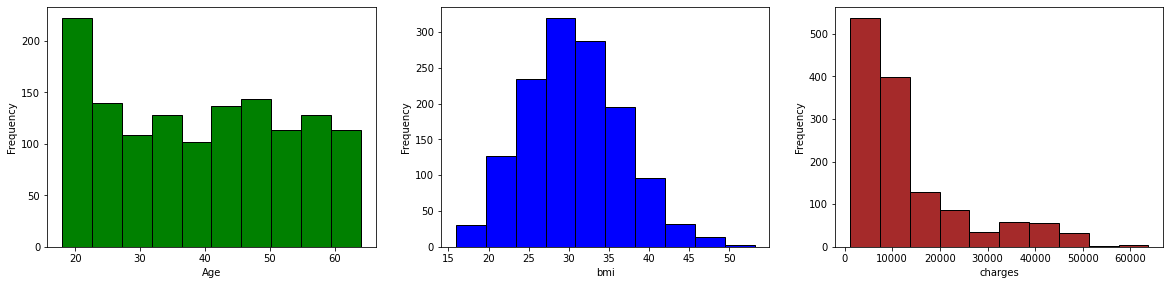

In [10]:

plt.subplot(3,3,1)
plt.xlabel('Age')
df['age'].plot(kind='hist',color='green',edgecolor='black',figsize=(20,15))


plt.subplot(3,3,2)
plt.xlabel('bmi')
df['bmi'].plot(kind='hist',color='blue',edgecolor='black',figsize=(20,15))


plt.subplot(3,3,3)
plt.xlabel('charges')
df['charges'].plot(kind='hist',color='brown',edgecolor='black',figsize=(20,15))


## Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [11]:
pd.DataFrame({'Skewness':[stats.skew(df.age),stats.skew(df.charges),stats.skew(df.bmi)]},index=['age','charges','bmi'])

,Skewness
age,0.055610
charges,1.514180
bmi,0.283729


## Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

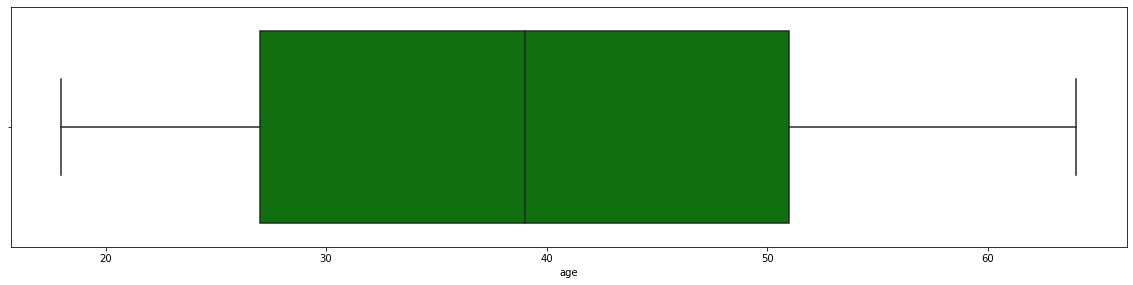

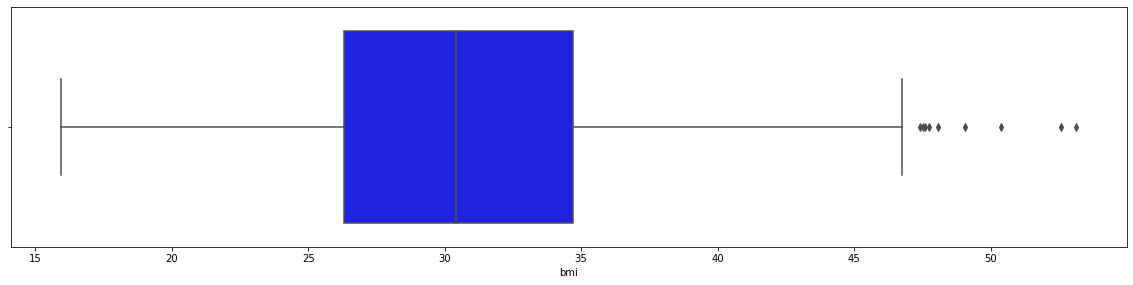

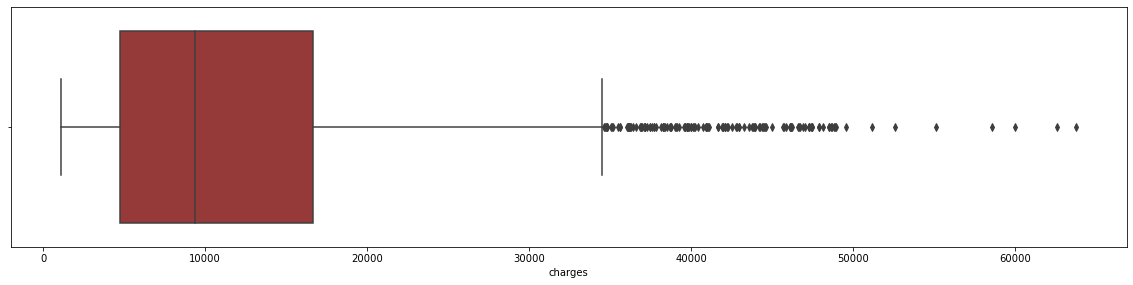

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.age,color='green')

plt.figure(figsize=(20,15))
plt.subplot(3,1,2)
sns.boxplot(x=df.bmi,color='blue')

plt.figure(figsize=(20,15))
plt.subplot(3,1,3)

sns.boxplot(x=df.charges,color='brown')

plt.show()

## Distribution of categorical columns (include children)

In [13]:
df['region'].value_counts()['southwest']


325

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Laptop\anaconda3\li

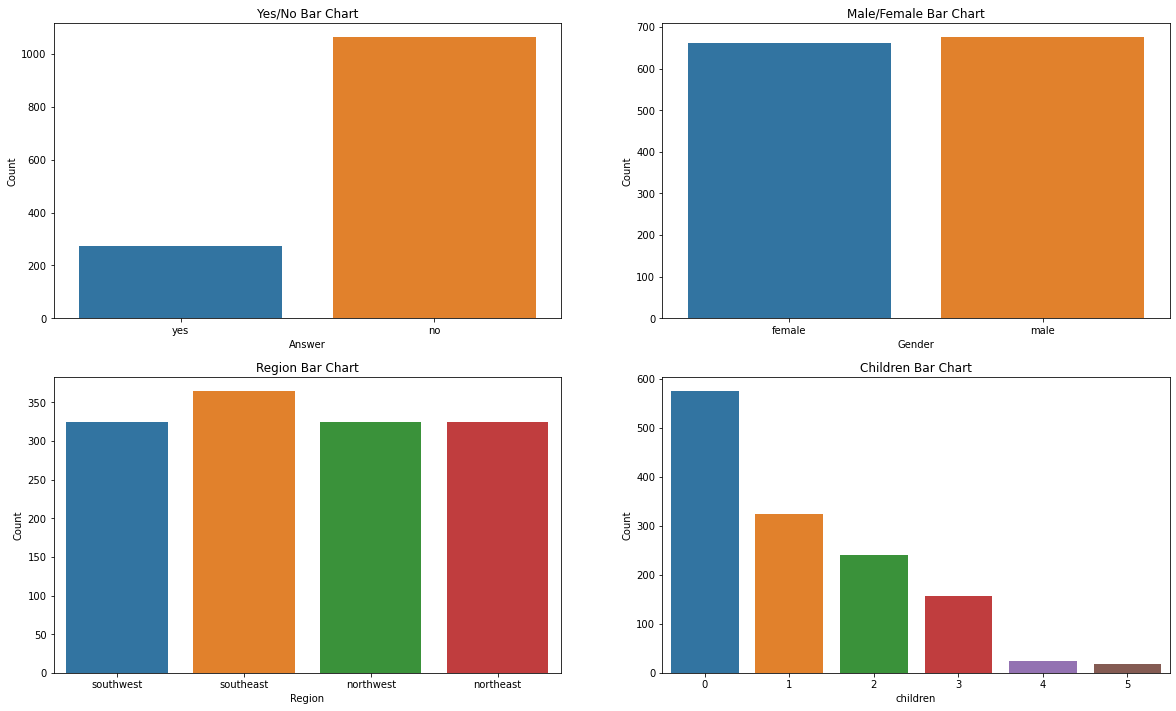

In [18]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)

sns.countplot(df['smoker'])

# Add labels and title
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Yes/No Bar Chart')

plt.subplot(4,2,2)
sns.countplot(df['sex'])
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male/Female Bar Chart')


plt.subplot(4,2,3)
sns.countplot(df['region'])

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Bar Chart')

plt.subplot(4,2,4)
sns.countplot(df['children'])

# Add labels and title
plt.xlabel('children')
plt.ylabel('Count')
plt.title('Children Bar Chart')
# Show chart
plt.show()

## Pair plot that includes all the columns of the data frame

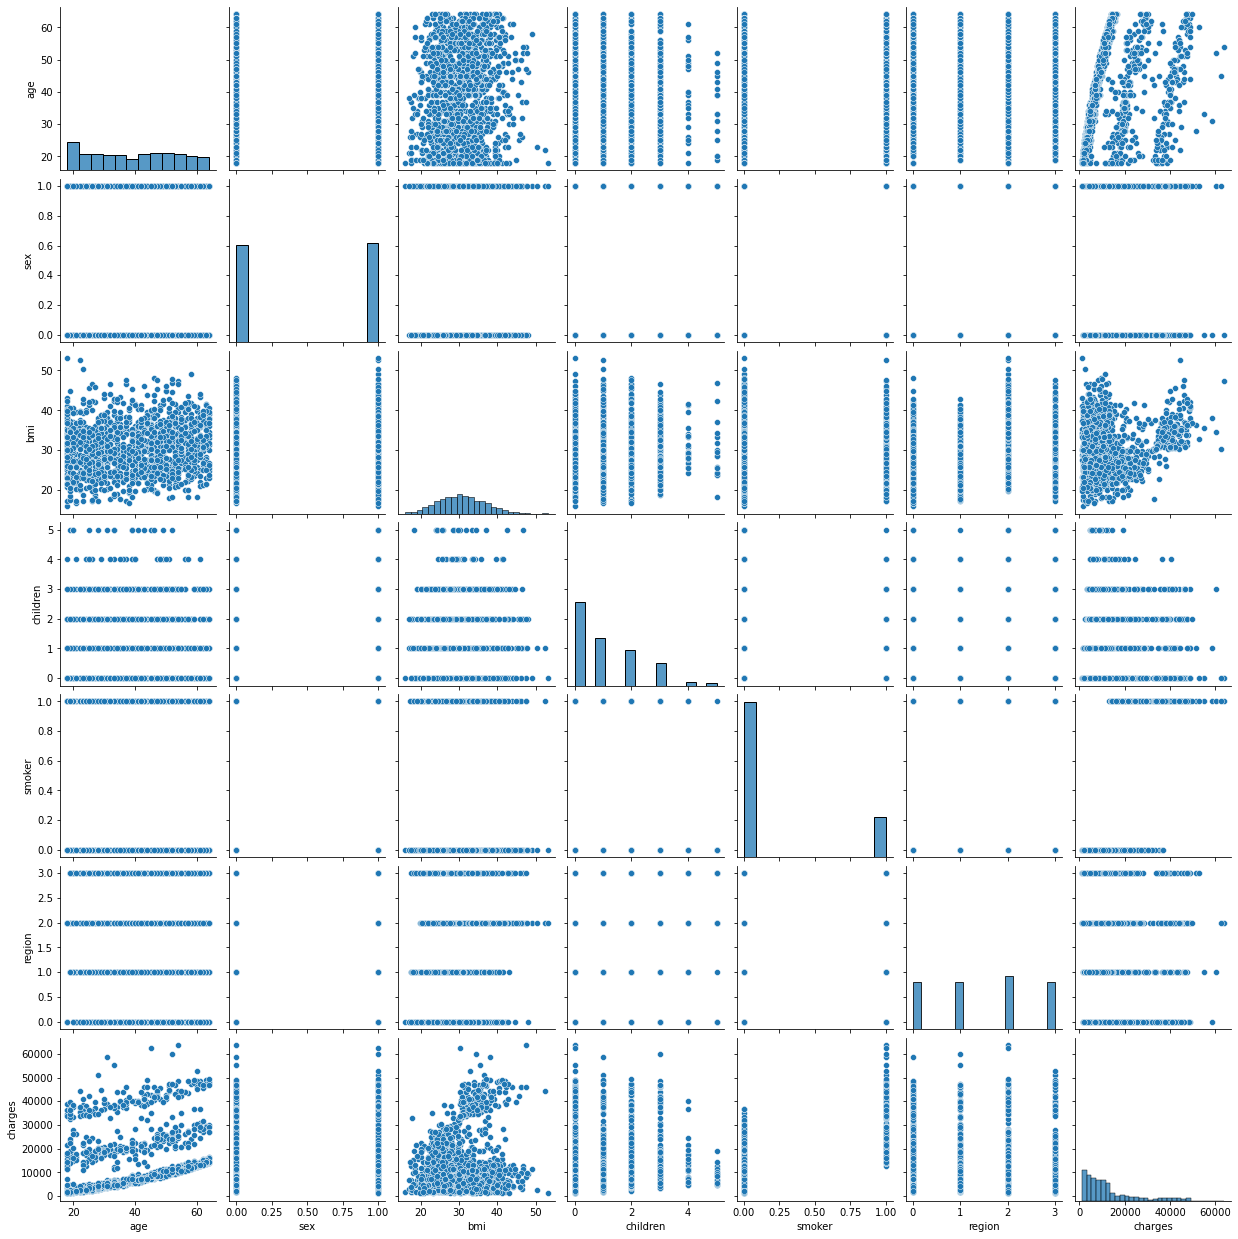

In [205]:

from sklearn.preprocessing import LabelEncoder

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker','region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [206]:
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Do charges of people who smoke differ significantly from the people who don't?

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


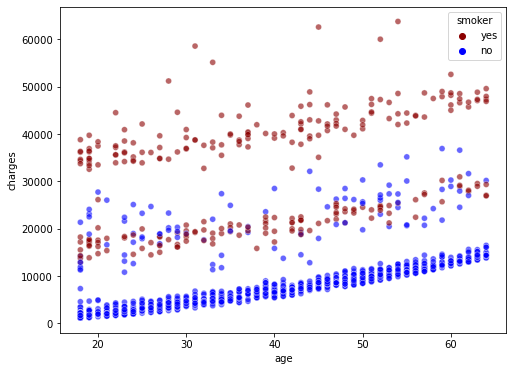

In [217]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['darkred','blue'] ,alpha=0.6)
plt.show()

In [218]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same "   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


## Does bmi of males differ significantly from that of females? 

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


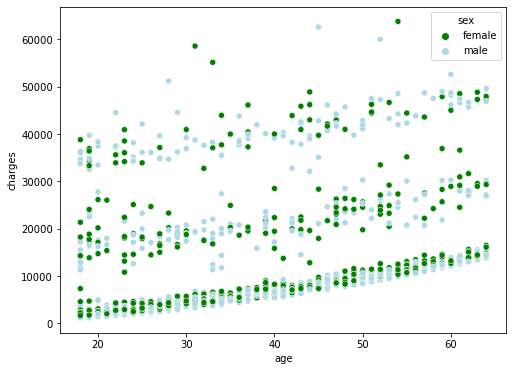

In [220]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['green','lightblue'] )
plt.show()

In [221]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


## Is the proportion of smokers significantly different in different genders?

In [222]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


## Is the distribution of bmi across women with no children, one child and two children, the same? 

In [223]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
